In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

## 台灣鳳梨基本情報

- **2011~2019 產量＆種植面積（折線-產量(ton)、直方-種植面積(公頃)）**

<img src="image/Pineapple area & production.jpg" width=500 height=500>

- **2011~ 2020 全國市場年度價格＆交易量（折線-價格(NTD/kg)、直方-交易量(kg)）**

<img src="image/全國鳳梨各年度價格＆交易量.jpg" width=1500 height=1200>


### 相關文章 


### 目前問題＆重點

### 讀取檔案

In [3]:
df_pineapple = pd.read_csv("analysis data/台中_鳳梨合併資料(價格&天氣).csv")
df_pineapple

,日期,Market,Product,High price,Mid price,Low price,Average price,Volume(kg),Price change rate,Volume change rate,...,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,UVI Max,Cloud Amount
0,2011-01-01,400 台中市,B2 鳳梨 金鑽鳳梨,21.2,17.3,12.0,17.0,17027,0.00,0.00,...,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,5,1.3
1,2011-01-02,400 台中市,B2 鳳梨 金鑽鳳梨,21.2,18.1,11.7,17.4,23476,0.02,0.38,...,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,6,1.7
2,2011-01-03,400 台中市,B2 鳳梨 金鑽鳳梨,21.2,18.1,11.7,17.4,23476,0.00,0.00,...,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,3,8.8
3,2011-01-04,400 台中市,B2 鳳梨 金鑽鳳梨,20.7,16.2,10.8,17.6,51764,0.01,1.20,...,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,6,5.8
4,2011-01-05,400 台中市,B2 鳳梨 金鑽鳳梨,20.0,16.9,10.0,17.5,11247,-0.01,-0.78,...,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,6,7.0


#### 讀取過後，資料型態被自動轉換 => 再次轉換回來

In [3]:
df_pineapple[['WD', 'WDGust', 'WSGust', 'UVI Max']] = df_pineapple[['WD', 'WDGust', 'WSGust', 'UVI Max']].astype("object")
df_pineapple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   日期                  3818 non-null   object 
 1   Market              3818 non-null   object 
 2   Product             3818 non-null   object 
 3   High price          3818 non-null   float64
 4   Mid price           3818 non-null   float64
 5   Low price           3818 non-null   float64
 6   Average price       3818 non-null   float64
 7   Volume(kg)          3818 non-null   int64  
 8   Price change rate   3818 non-null   float64
 9   Volume change rate  3818 non-null   float64
 10  StnPres             3818 non-null   float64
 11  SeaPres             3818 non-null   float64
 12  StnPresMax          3818 non-null   float64
 13  StnPresMin          3818 non-null   float64
 14  Temperature         3818 non-null   float64
 15  T Max               3818 non-null   float64
 16  T Min 

### 數值型資料（Numerical data distribution）

In [4]:
df_num = df_pineapple.select_dtypes(include=["int64", "float64"])
df_num

,High price,Mid price,Low price,Average price,Volume(kg),Price change rate,Volume change rate,StnPres,SeaPres,StnPresMax,...,Precp,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount
0,21.2,17.3,12.0,17.0,17027,0.00,0.00,903.2,1517.6,904.8,...,0.0,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,1.3
1,21.2,18.1,11.7,17.4,23476,0.02,0.38,905.0,1533.4,906.4,...,0.0,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,1.7
2,21.2,18.1,11.7,17.4,23476,0.00,0.00,904.4,1528.6,906.4,...,0.0,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,8.8
3,20.7,16.2,10.8,17.6,51764,0.01,1.20,904.7,1532.7,906.2,...,0.0,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,5.8
4,20.0,16.9,10.0,17.5,11247,-0.01,-0.78,904.5,1535.5,906.5,...,0.5,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,29.0,18.2,9.7,21.0,163380,-0.01,0.24,898.6,1493.7,900.4,...,22.0,6.2,2.5,6.0,4.4,32.5,16.21,22.5,-2.8,7.2
3814,28.5,17.8,8.0,21.1,87697,0.00,-0.46,899.3,1502.2,901.8,...,0.5,0.3,0.5,0.5,3.8,28.1,16.23,25.5,-2.0,7.5
3815,28.0,15.2,5.7,20.3,82402,-0.04,-0.06,901.7,1524.9,903.6,...,22.5,6.2,7.5,14.5,2.8,20.7,14.51,7.5,-3.1,7.8
3816,26.5,16.1,7.4,19.4,85591,-0.04,0.04,901.4,1522.1,903.1,...,13.0,1.7,5.5,11.5,4.9,35.4,20.10,22.5,-3.9,6.2


In [5]:
# 變換欄位順序 => 把average price拉出來放在最後一欄
col_target = list(df_num["Average price"])
df_num.drop(columns="Average price", inplace=True)
df_num.insert(27, "Average price", col_target)

C:\Users\Tibame\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df_num

,High price,Mid price,Low price,Volume(kg),Price change rate,Volume change rate,StnPres,SeaPres,StnPresMax,StnPresMin,...,PrecpHour,PrecpMax10,PrecpMax60,SunShine,SunShineRate,GloblRad,VisbMean,EvapA,Cloud Amount,Average price
0,21.2,17.3,12.0,17027,0.00,0.00,903.2,1517.6,904.8,901.7,...,0.0,0.0,0.0,9.6,90.2,12.96,10.0,1.8,1.3,17.0
1,21.2,18.1,11.7,23476,0.02,0.38,905.0,1533.4,906.4,903.8,...,0.0,0.0,0.0,9.7,91.1,13.20,10.8,2.0,1.7,17.4
2,21.2,18.1,11.7,23476,0.00,0.00,904.4,1528.6,906.4,903.2,...,0.0,0.0,0.0,1.1,10.3,3.39,11.0,0.4,8.8,17.4
3,20.7,16.2,10.8,51764,0.01,1.20,904.7,1532.7,906.2,903.7,...,0.0,0.0,0.0,6.4,60.0,11.96,14.0,-1.4,5.8,17.6
4,20.0,16.9,10.0,11247,-0.01,-0.78,904.5,1535.5,906.5,902.6,...,4.4,0.5,0.5,5.1,47.8,10.17,17.0,-1.2,7.0,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,29.0,18.2,9.7,163380,-0.01,0.24,898.6,1493.7,900.4,896.5,...,6.2,2.5,6.0,4.4,32.5,16.21,22.5,-2.8,7.2,21.0
3814,28.5,17.8,8.0,87697,0.00,-0.46,899.3,1502.2,901.8,897.9,...,0.3,0.5,0.5,3.8,28.1,16.23,25.5,-2.0,7.5,21.1
3815,28.0,15.2,5.7,82402,-0.04,-0.06,901.7,1524.9,903.6,900.5,...,6.2,7.5,14.5,2.8,20.7,14.51,7.5,-3.1,7.8,20.3
3816,26.5,16.1,7.4,85591,-0.04,0.04,901.4,1522.1,903.1,898.8,...,1.7,5.5,11.5,4.9,35.4,20.10,22.5,-3.9,6.2,19.4


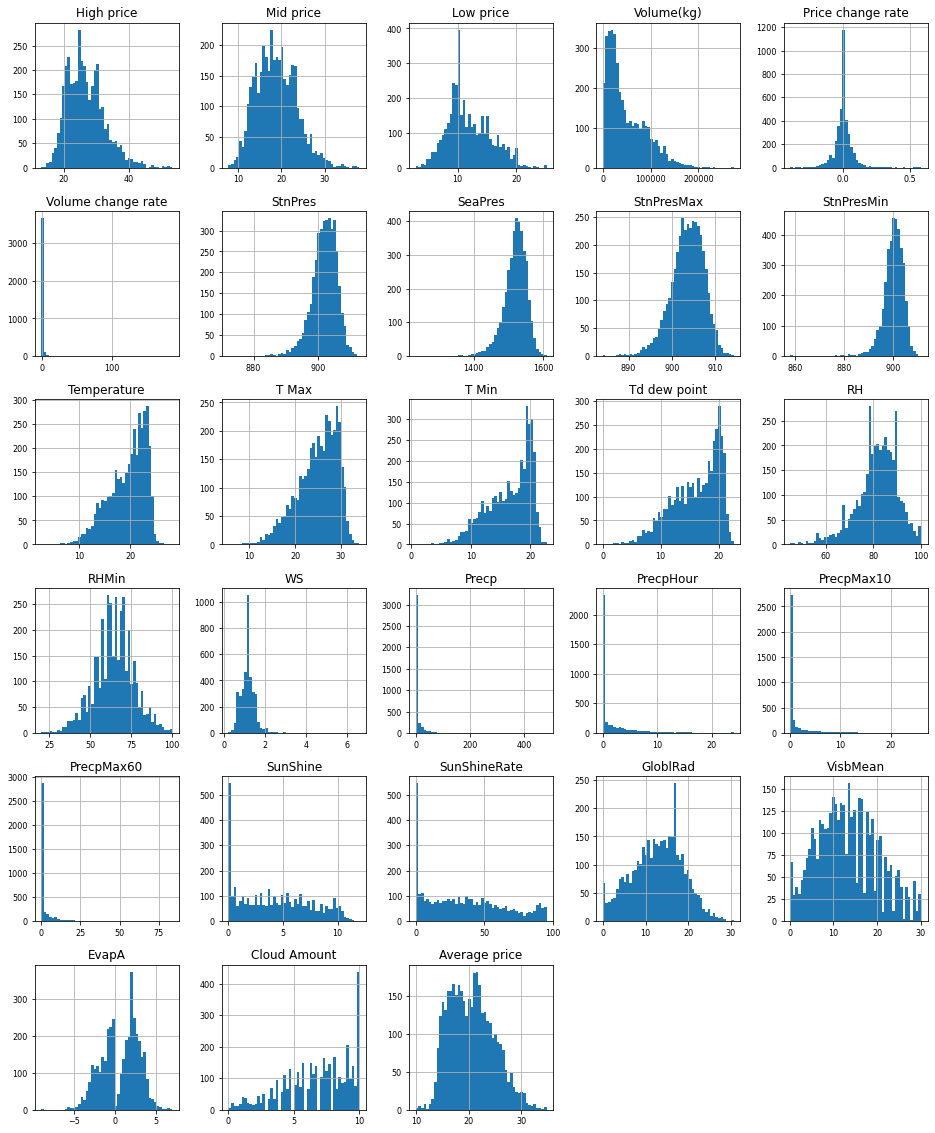

In [7]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
df_num_corr = df_num.corr()["Average price"][:-1]
df_num_corr
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
golden_features_list

Mid price            0.873887
High price           0.834613
Low price            0.719053
Td dew point         0.220070
T Min                0.216028
Temperature          0.209777
T Max                0.180597
Price change rate    0.135463
StnPresMin          -0.118113
StnPres             -0.122794
StnPresMax          -0.126378
Name: Average price, dtype: float64

#### 相關係數（Correlation）

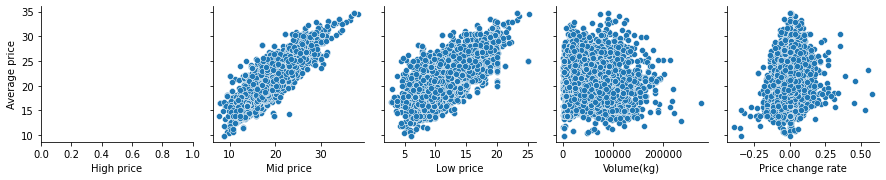

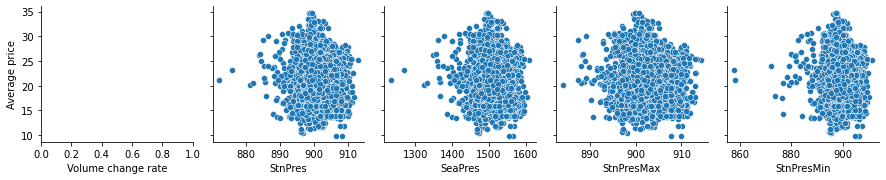

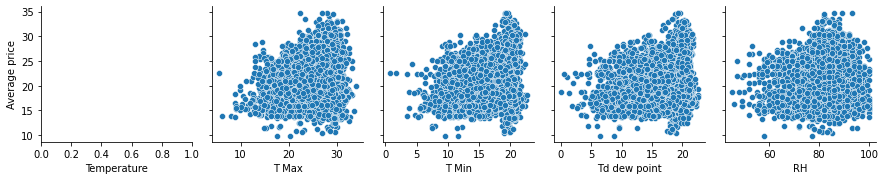

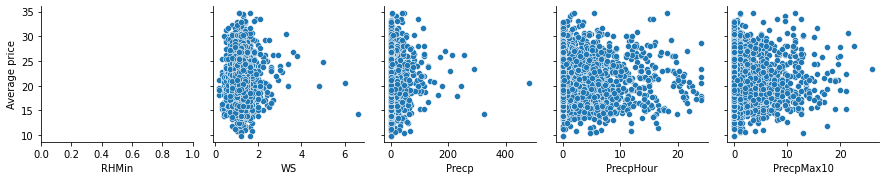

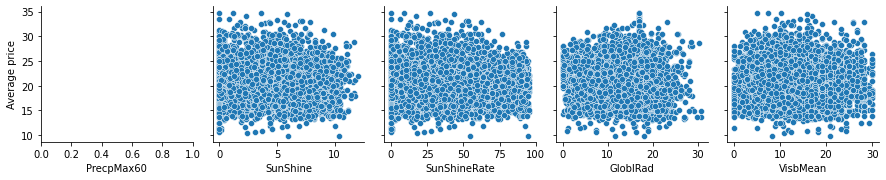

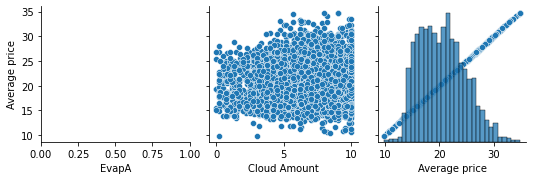

In [9]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Average price'])

### Feature to feature relationship

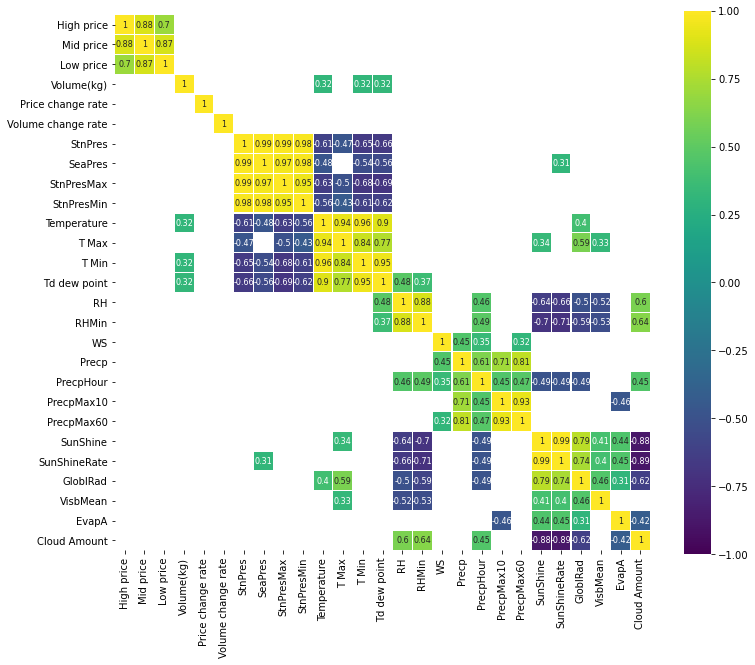

In [10]:
corr = df_num.drop('Average price', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);

### VIF(Variance Inflation Factor) => 用以判斷是否為高度共線性

- 何謂共線性: 當2個（或以上）的自變數互不獨立(即彼此相關)，就是具有「共線性」。「共線性」會使迴歸模型中存在著重複的自變數，提高某一自變數的解釋力與預測力，使得理論的建構不正確
- 多元回歸時，兩兩變數的相關係數參考性降低，必須仰賴輔助回歸判定係數
- 一般 VIF 值越大，認為共線性越強。在實務上認為，若最大的 VIF 超過 10，則變數間存在著**嚴重的共線性**。
- 公式：

<img src="image/vif formula.png" width=500 height=500>

[高度共線性 (high degree of multicollinearity) 問題的診斷: VIF 算法](https://www.youtube.com/watch?v=q_PjZOkPR90)

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# demo範例
df_123= pd.DataFrame({'a': [1, 2, 3, 4, 5],
'b': [2, 2, 3, 2, 1],
'c': [4, 6, 7, 8, 9],
'd': [4, 3, 4, 5, 4]})

X= StandardScaler().fit_transform(df_123)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['columns'] = df_123.columns
vif

,VIF Factor,columns
0,135.0,a
1,3.0,b
2,111.0,c
3,3.0,d


In [12]:
X.shape[1]

4

In [13]:
X = StandardScaler().fit_transform(df_num)
X

array([[-0.96495653, -0.33574047,  0.04121131, ...,  0.49537078,
        -2.158094  , -0.83358858],
       [-0.96495653, -0.16057253, -0.04046966, ...,  0.58348901,
        -1.99897071, -0.73913067],
       [-0.96495653, -0.16057253, -0.04046966, ..., -0.12145683,
         0.8254677 , -0.73913067],
       ...,
       [ 0.20365548, -0.79555632, -1.67408894, ..., -1.66352586,
         0.42765947, -0.05431082],
       [-0.05412658, -0.59849239, -1.21123014, ..., -2.01599878,
        -0.20883369, -0.26684112],
       [-0.46657788, -1.43054012, -1.48350002, ...,  1.55278954,
        -0.36795698, -0.31407008]])

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['columns'] = df_num.columns
vif

,VIF Factor,columns
0,6.813824,High price
1,12.947187,Mid price
2,4.724110,Low price
3,1.895849,Volume(kg)
4,1.045095,Price change rate
5,1.013787,Volume change rate
6,2258.178138,StnPres
7,1644.163821,SeaPres
8,86.896077,StnPresMax
9,74.029374,StnPresMin


#### 待釐清
- 了解意義
- 是否準確

### 時間序列分析

In [15]:
df_pineapple["日期"] = pd.to_datetime(df_pineapple["日期"])

<AxesSubplot:xlabel='日期'>

C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0, flags=flags)


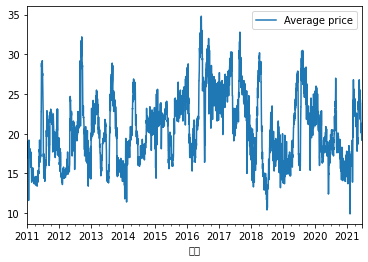

In [16]:
df_pineapple.plot(x="日期", y="Average price")

In [17]:
df_pineapple.dtypes

日期                    datetime64[ns]
Market                        object
Product                       object
High price                   float64
Mid price                    float64
Low price                    float64
Average price                float64
Volume(kg)                     int64
Price change rate            float64
Volume change rate           float64
StnPres                      float64
SeaPres                      float64
StnPresMax                   float64
StnPresMin                   float64
Temperature                  float64
T Max                        float64
T Min                        float64
Td dew point                 float64
RH                             int64
RHMin                          int64
WS                           float64
WD                            object
WSGust                        object
WDGust                        object
Precp                        float64
PrecpHour                    float64
PrecpMax10                   float64
P